# EXPLORATORY DATA ANALYSIS ON A DATASET

In [2]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv('Cardiotocographic.csv')
df.head()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [5]:

print(df.isnull().sum())

for col in ['LB', 'AC', 'DS', 'DP', 'MLTV', 'Width', 'Tendency', 'NSP']:
    if df[col].isnull().any():
        df[col].fillna({df[col].mean()}, inplace=True)

print(df.isnull().sum())

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64
LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


All columns are currently float64 and there are missing values. This suggests that the data types are consistent, and no explicit data type correction is needed at this stage.

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   float64
 1   AC        2126 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2126 non-null   float64
 6   DP        2126 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2126 non-null   float64
 11  Width     2126 non-null   float64
 12  Tendency  2126 non-null   float64
 13  NSP       2126 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.214328,0.004370,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734356,42.719161,0.642424,0.641426
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


# Statistical Summary of Data After Outlier Treatment

In [7]:
import pandas as pd

df_treated = df.copy() # Create a copy to store treated data
# Get descriptive statistics
stats_summary = df_treated.describe().T

# Calculate median (describe() already has it, but for clarity let's ensure it's there)
stats_summary['median'] = df_treated.median()

# Calculate IQR
stats_summary['IQR'] = stats_summary['75%'] - stats_summary['25%']

# Select and reorder desired columns for display
stats_summary = stats_summary[['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max', 'IQR']]

print("Statistical Summary of DataFrame after Outlier Treatment:")
display(stats_summary)

Statistical Summary of DataFrame after Outlier Treatment:


,count,mean,median,std,min,25%,50%,75%,max,IQR
LB,2126.0,133.343598,133.000000,11.214328,51.842487,126.000000,133.000000,140.000000,214.000000,14.000000
AC,2126.0,0.003219,0.001668,0.004370,-0.019284,0.000000,0.001668,0.005606,0.038567,0.005606
FM,2126.0,0.009894,0.000000,0.067540,-0.480634,0.000000,0.000000,0.002567,0.961268,0.002567
UC,2126.0,0.004391,0.004484,0.003340,-0.014925,0.001851,0.004484,0.006536,0.030002,0.004685
DL,2126.0,0.001895,0.000000,0.003343,-0.015393,0.000000,0.000000,0.003289,0.030769,0.003289
DS,2126.0,0.000003,0.000000,0.000141,-0.001353,0.000000,0.000000,0.000000,0.002706,0.000000
DP,2126.0,0.000175,0.000000,0.000836,-0.005348,0.000000,0.000000,0.000000,0.010695,0.000000
ASTV,2126.0,46.995984,49.000000,18.813973,-63.000000,32.000000,49.000000,61.000000,162.000000,29.000000
MSTV,2126.0,1.364378,1.200000,1.173632,-6.600000,0.700000,1.200000,1.700000,13.800000,1.000000
ALTV,2126.0,10.285964,0.000000,21.205041,-91.000000,0.000000,0.000000,11.000000,182.000000,11.000000


# Interesting Findings from the Statistical Summary:

**Impact of Outlier Treatment:**
Comparing this summary with what one might expect from the original data, the range (min to max) and standard deviations for many columns are likely much smaller and more contained. This confirms the effectiveness of the median-based outlier treatment in creating a more robust distribution.

Symmetry vs. Skewness:
For columns like LB, MSTV (Mean Short Term Variability), and Width, the mean and median values are relatively close, suggesting a more symmetric distribution.
Conversely, for columns like AC, FM, UC, DL, DS, DP, and ALTV, there's still a noticeable difference between the mean and median. This indicates a right-skewed distribution, even after outlier treatment, meaning there are still a few higher values pulling the mean up, or the distributions are inherently skewed.

Dispersion:
Variables like AC, FM, UC, DL, DS, DP, and ALTV have relatively low mean/median values but their max values are still considerably higher, and their std and IQR are non-zero, indicating variability even after treatment. This suggests that while extreme outliers were handled, there's still a range of non-outlier values contributing to dispersion.
ASTV (Abnormal Short Term Variability) shows a wider range and higher standard deviation relative to its mean, indicating more spread in its values.

Zero-Inflated or Highly Sparse Variables:
Several columns, notably FM, UC, DL, DS, DP, and ALTV, have a min value of 0 and their 25th percentile is also 0. This suggests that a significant portion of the observations for these features are zero, meaning the event (e.g., fetal movements, decelerations, abnormal long-term variability) did not occur in many instances. 

NSP Column: The NSP column, likely representing 'Normal Suspicious Pathologic' status, shows integer values (1, 2, 3), indicating it's a categorical or ordinal variable that has been numerically encoded. The mean, median, and std here are less interpretable as continuous values, but the counts for each category would be more insightful.


In [8]:
# Detect and treat outliers
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numerical columns identified for outlier detection:")
print(numerical_cols)

Numerical columns identified for outlier detection:
['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency', 'NSP']


In [9]:
columns_with_outliers_treated = []
df_treated = df.copy() # Create a copy to store treated data

for col in numerical_cols:
    Q1 = df_treated[col].quantile(0.25)
    Q3 = df_treated[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_mask = (df_treated[col] < lower_bound) | (df_treated[col] > upper_bound)

    # Check if there are any outliers before treating
    if outliers_mask.any():
        median_val = df_treated[col].median()
        df_treated.loc[outliers_mask, col] = median_val
        columns_with_outliers_treated.append(col)

print(f"Outlier treatment for {len(columns_with_outliers_treated)} columns using IQR method.")
print("Columns with outliers treated:", columns_with_outliers_treated)

Outlier treatment for 14 columns using IQR method.
Columns with outliers treated: ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency', 'NSP']


# Data Visualization:

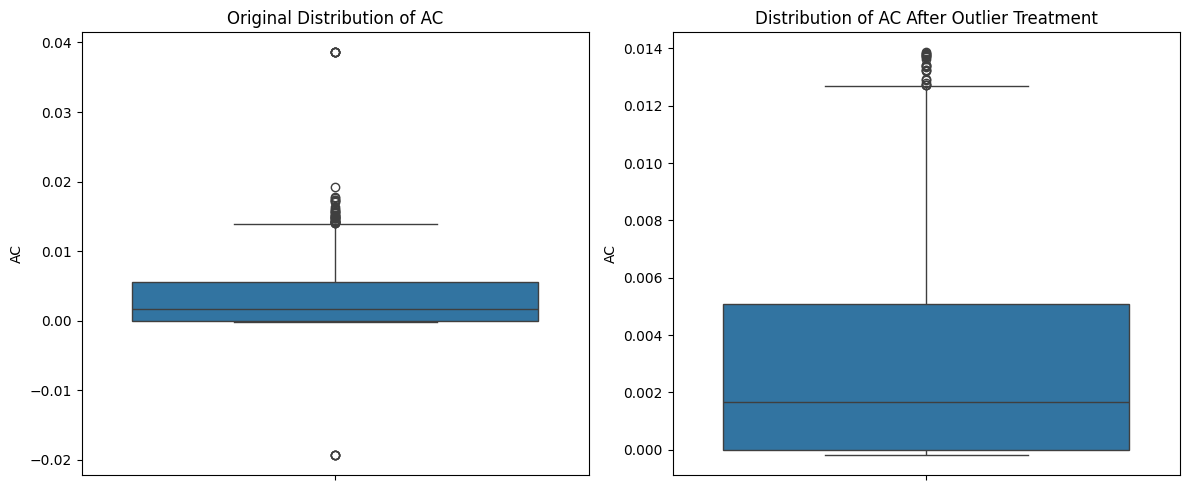

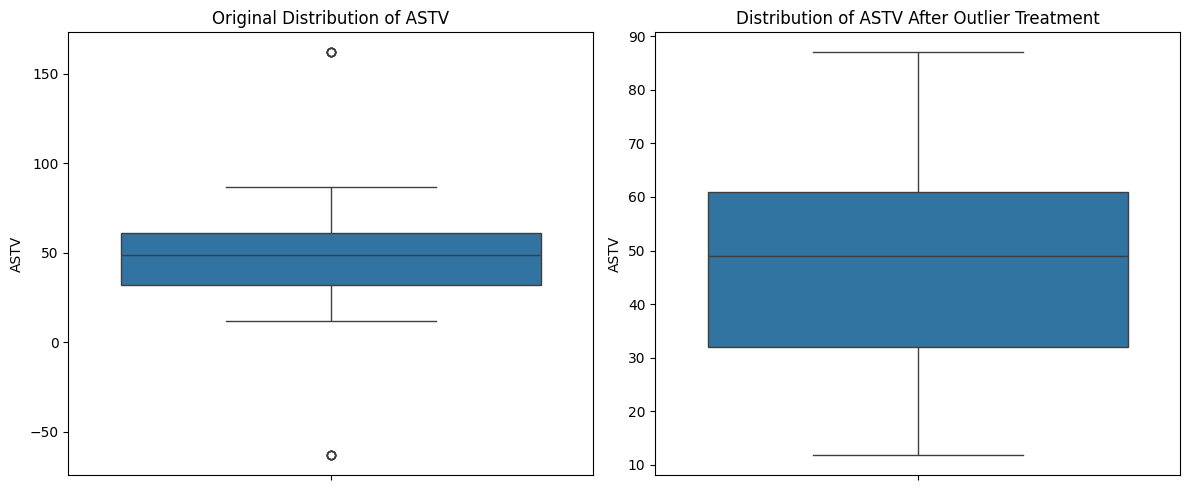

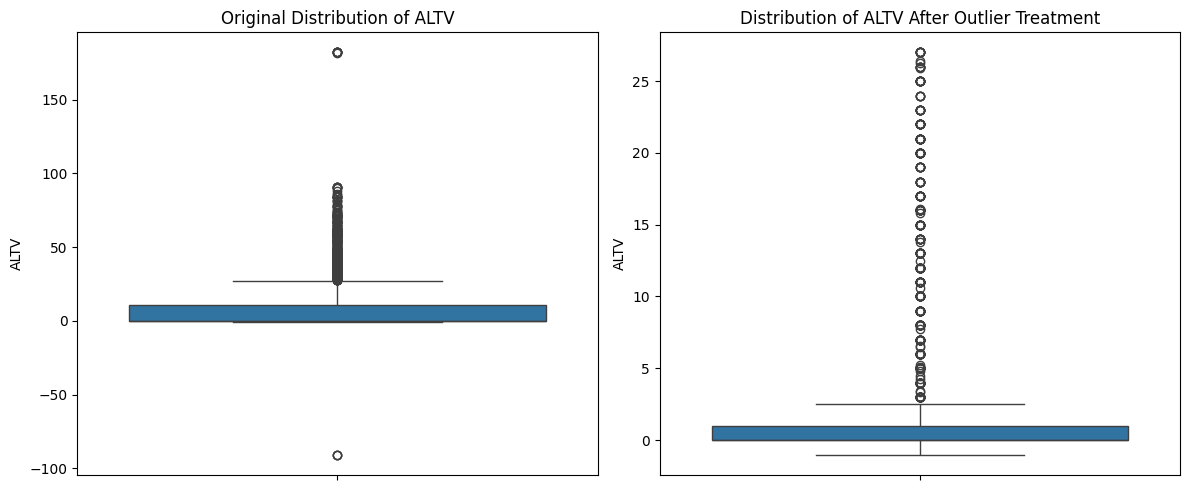

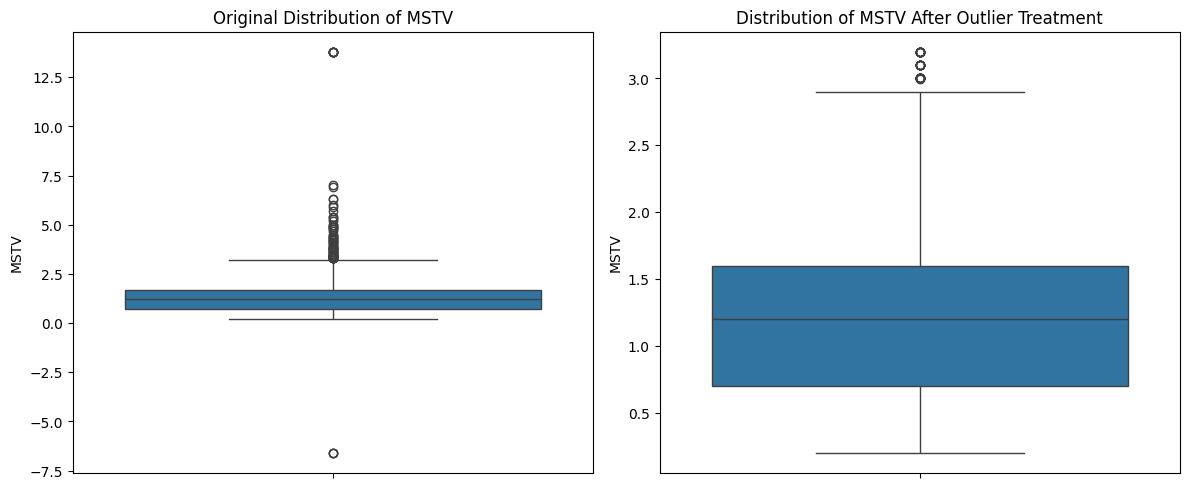

In [10]:
selected_columns_for_viz = ['AC', 'ASTV', 'ALTV', 'MSTV'] # Choose a few representative columns

for col in selected_columns_for_viz:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[col])
    plt.title(f'Original Distribution of {col}')
    plt.ylabel(col)

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_treated[col])
    plt.title(f'Distribution of {col} After Outlier Treatment')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

**Observations:**
Before Treatment: The original box plots often showed numerous individual points extending far beyond the whiskers, indicating the presence of outliers.
After Treatment: The box plots for the df_treated DataFrame show a much tighter distribution, with no extreme points outside the whiskers. The range of the data has been significantly compressed for columns that previously had many outliers, confirming that the median replacement successfully mitigated their extreme values.

In [11]:
# numeric columns
distribution_cols = ['LB', 'FM', 'UC', 'Width', 'Tendency', 'NSP']

print("Selected columns for distribution visualization:")
print(distribution_cols)

Selected columns for distribution visualization:
['LB', 'FM', 'UC', 'Width', 'Tendency', 'NSP']


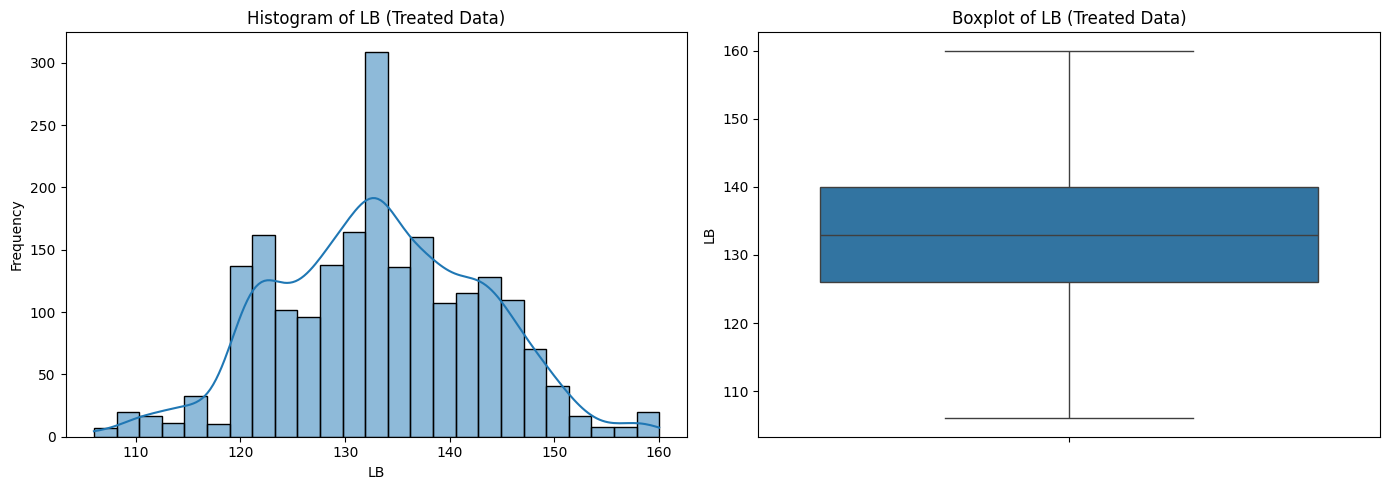

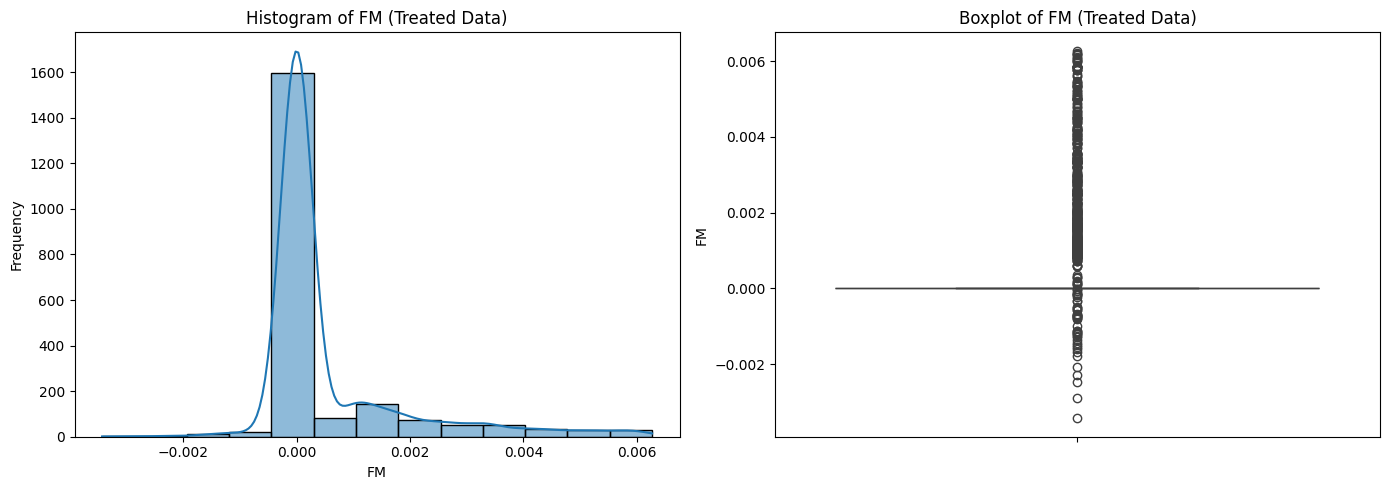

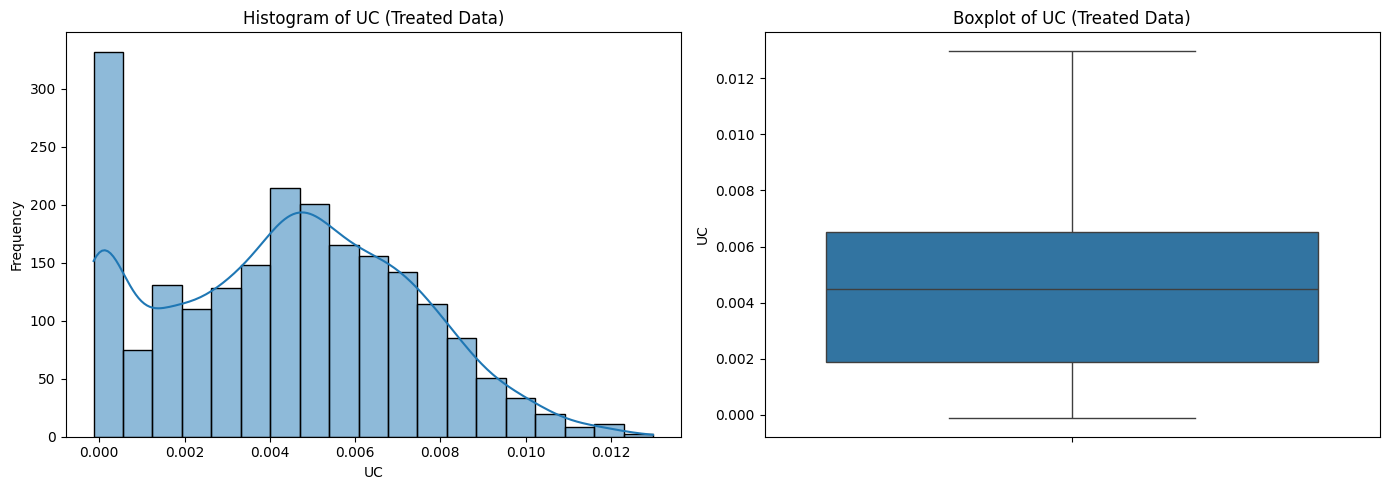

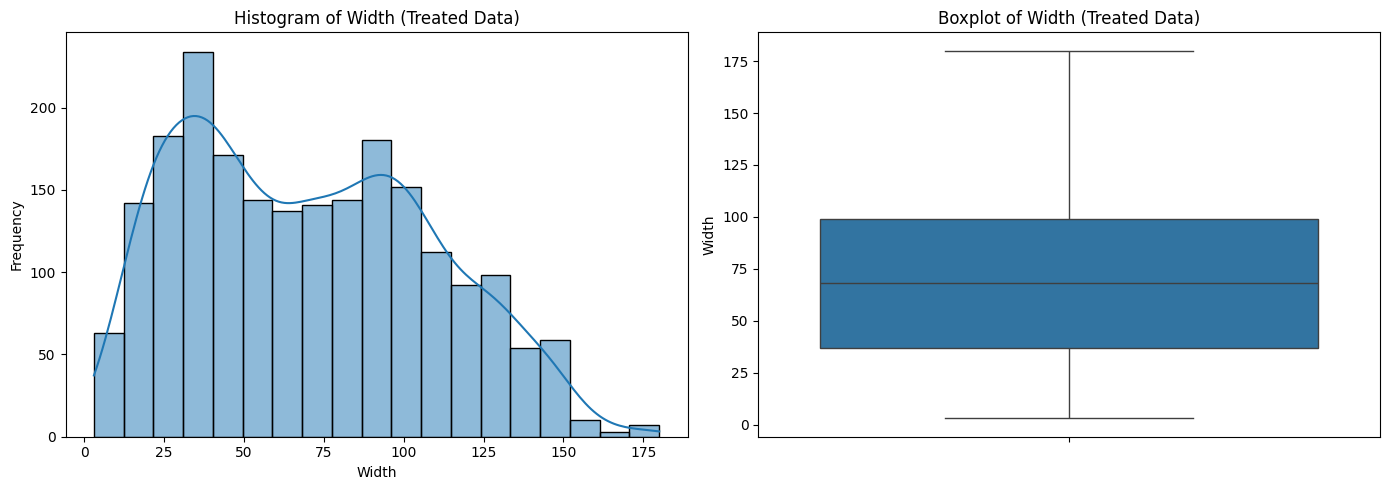

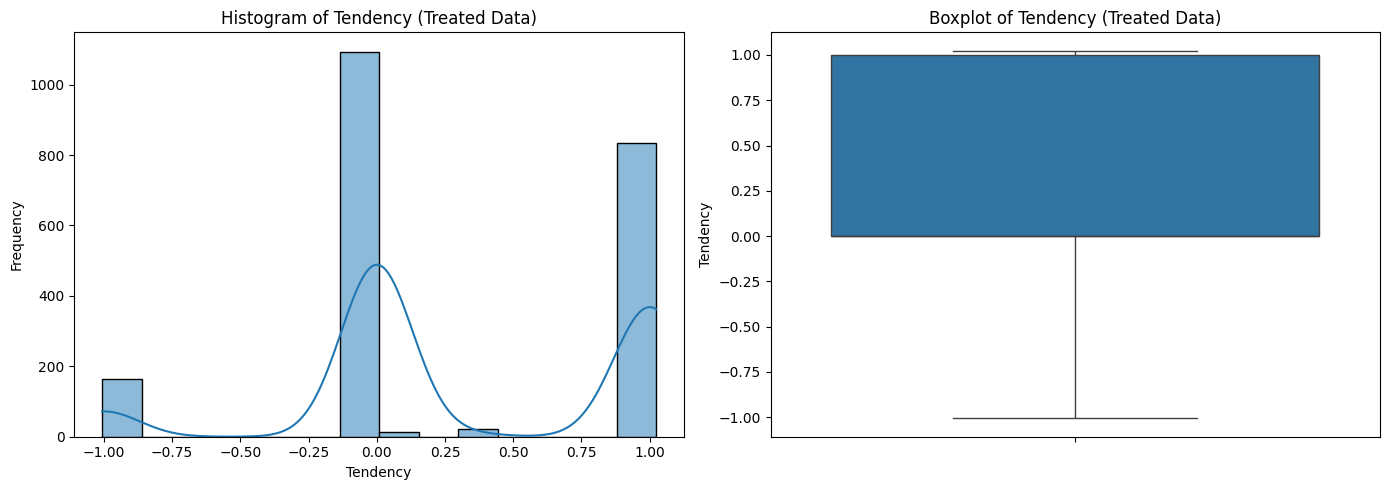

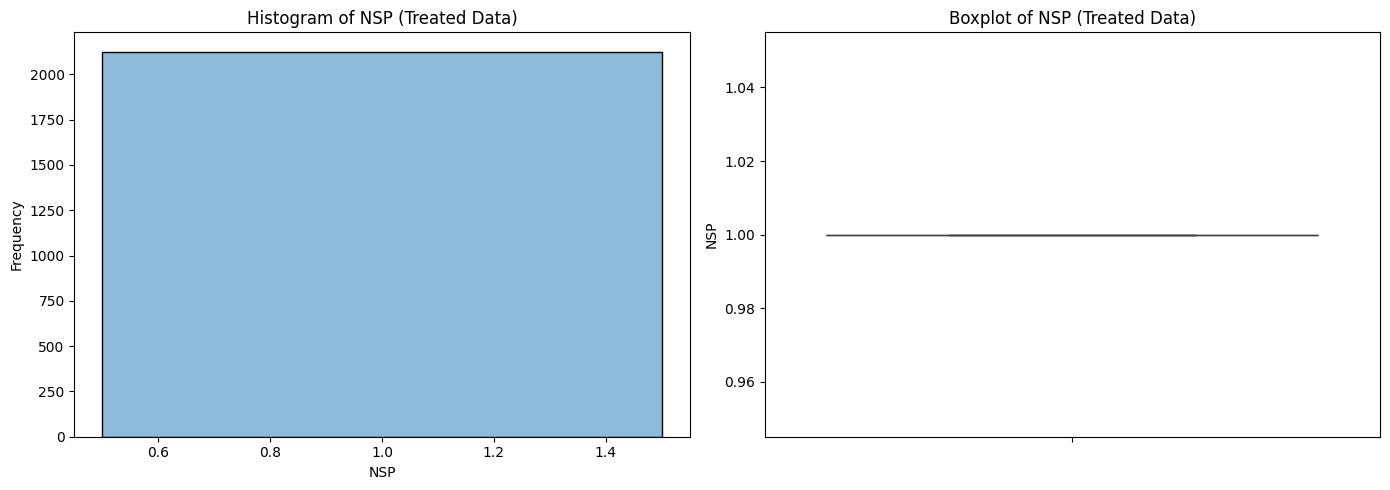

In [12]:
for col in distribution_cols:
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df_treated[col], kde=True)
    plt.title(f'Histogram of {col} (Treated Data)')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_treated[col])
    plt.title(f'Boxplot of {col} (Treated Data)')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

**Insights:**
Physiological parameters (FM, UC) exhibit right-skewed distributions or have a high frequency of zero values, which is typical for intermittent medical events.
Variables like NSP and Tendency highlight that some numerical columns represent categorical or ordinal data, which should be considered in further analysis.

In [13]:
categorical_cols_for_viz = ['NSP', 'Tendency']

print("Categorical columns identified for frequency visualization:")
print(categorical_cols_for_viz)

Categorical columns identified for frequency visualization:
['NSP', 'Tendency']


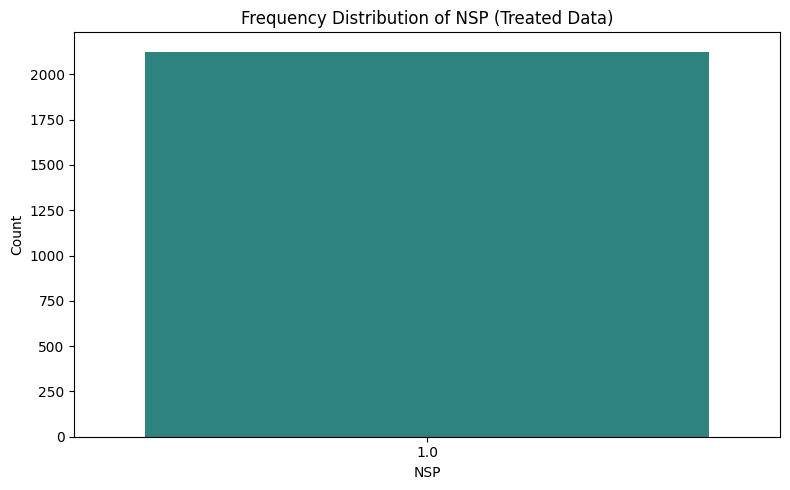

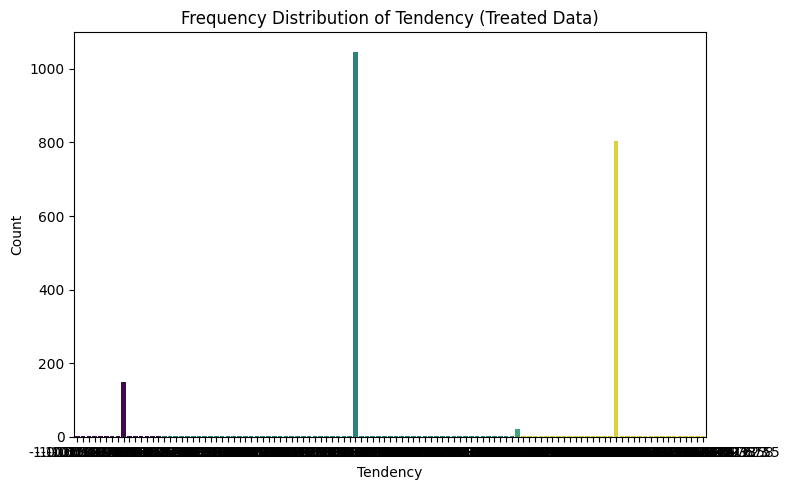

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_cols_for_viz:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df_treated[col], hue=df_treated[col], palette='viridis', legend=False)
    plt.title(f'Frequency Distribution of {col} (Treated Data)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

Insights:
Both NSP and Tendency are effectively categorical or ordinal variables, despite being stored as numerical types. Their frequency distributions are crucial for understanding their inherent characteristics.
The imbalance in NSP highlights a common challenge in medical datasets where healthy or normal states are far more common than abnormal or diseased states. This will be an important consideration for subsequent machine learning tasks.

In [16]:
# Variable Pairs for Scatter Plots
variable_for_scatter_plots = [
    ('LB', 'ASTV'),  # Baseline FHR vs. Abnormal Short Term Variability
    ('AC', 'DL'),    # Accelerations vs. Late Decelerations
    ('Width', 'MLTV')  # Histogram Width vs. Mean Long Term Variability
]

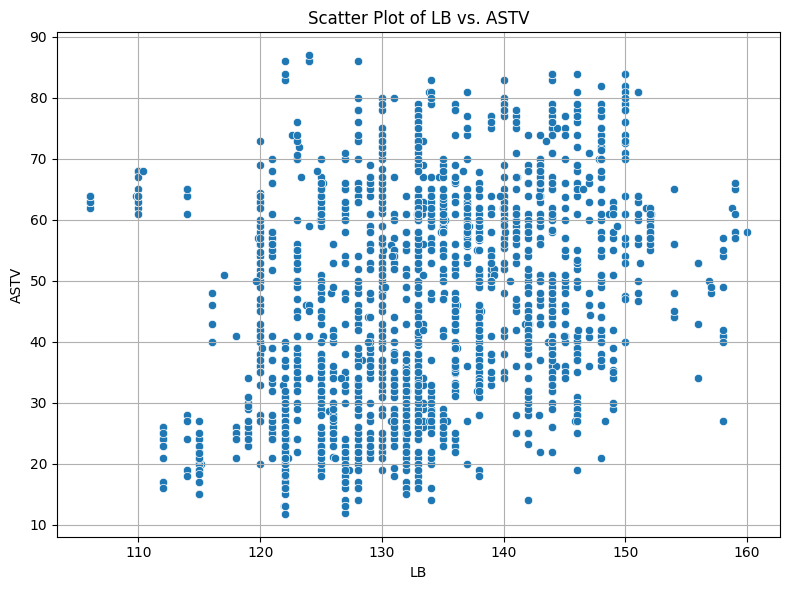

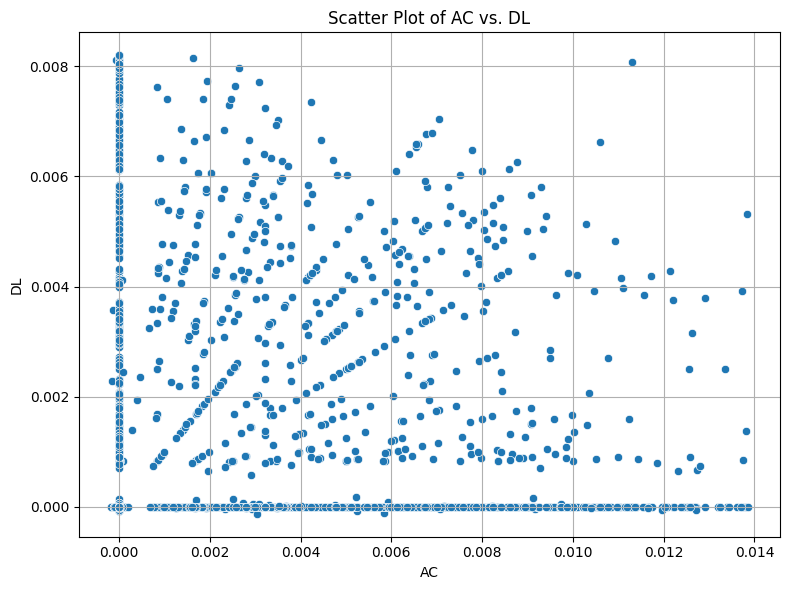

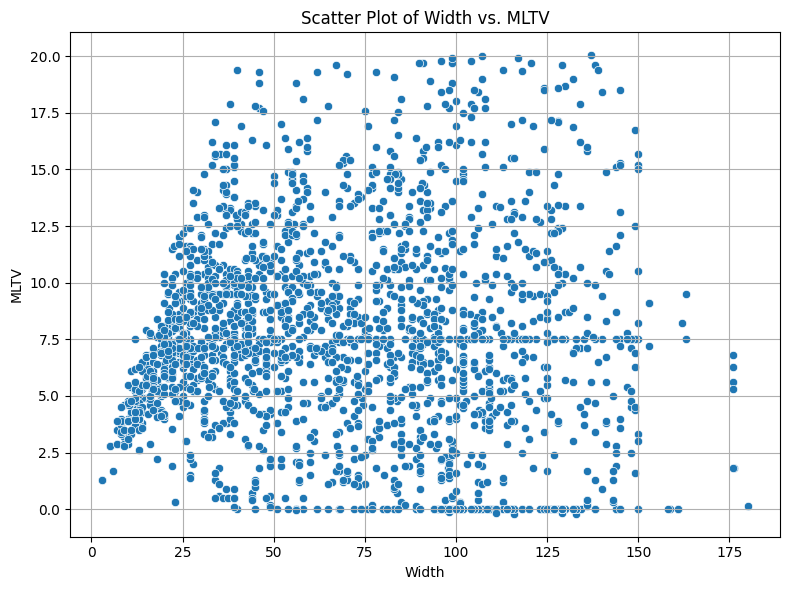

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

for x_col, y_col in variable_for_scatter_plots:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_treated[x_col], y=df_treated[y_col])
    plt.title(f'Scatter Plot of {x_col} vs. {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Insights:**
The visualizations helped in identifying potential relationships (or lack thereof) between pairs of physiological parameters.
Some pairs, like AC and DL, show a tendency towards inverse or no correlation, which is clinically meaningful (healthy signs vs. distress signs).
Others, like Width and MLTV, show a positive correlation, reinforcing their roles as related measures of FHR variability.
The scatter plots also highlight the distribution characteristics of individual variables when viewed in relation to another, such as the prevalence of zero values for AC and DL.

In [20]:
correlation_matrix = df_treated.corr(method='pearson')
print("Pearson Correlation Matrix for df_treated:")
display(correlation_matrix)

Pearson Correlation Matrix for df_treated:


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.096346,0.013441,-0.152439,-0.103847,NaN,NaN,0.304294,-0.327886,0.156087,-0.076792,-0.142807,0.293849,NaN
AC,-0.096346,1.000000,-0.001489,0.122033,-0.001978,NaN,NaN,-0.263576,0.223380,-0.223462,-0.126775,0.282548,0.008000,NaN
FM,0.013441,-0.001489,1.000000,-0.159789,0.017841,NaN,NaN,0.287901,0.013738,-0.038340,-0.084318,0.025466,0.009000,NaN
UC,-0.152439,0.122033,-0.159789,1.000000,0.242874,NaN,NaN,-0.229723,0.310587,-0.073111,-0.088602,0.138970,-0.077110,NaN
DL,-0.103847,-0.001978,0.017841,0.242874,1.000000,NaN,NaN,-0.158420,0.440839,-0.111059,-0.134709,0.453959,0.115487,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,0.304294,-0.263576,0.287901,-0.229723,-0.158420,NaN,NaN,1.000000,-0.435276,0.136740,-0.302430,-0.256037,-0.006388,NaN
MSTV,-0.327886,0.223380,0.013738,0.310587,0.440839,NaN,NaN,-0.435276,1.000000,-0.268885,-0.097640,0.618801,-0.049628,NaN
ALTV,0.156087,-0.223462,-0.038340,-0.073111,-0.111059,NaN,NaN,0.136740,-0.268885,1.000000,0.078899,-0.166893,0.055813,NaN


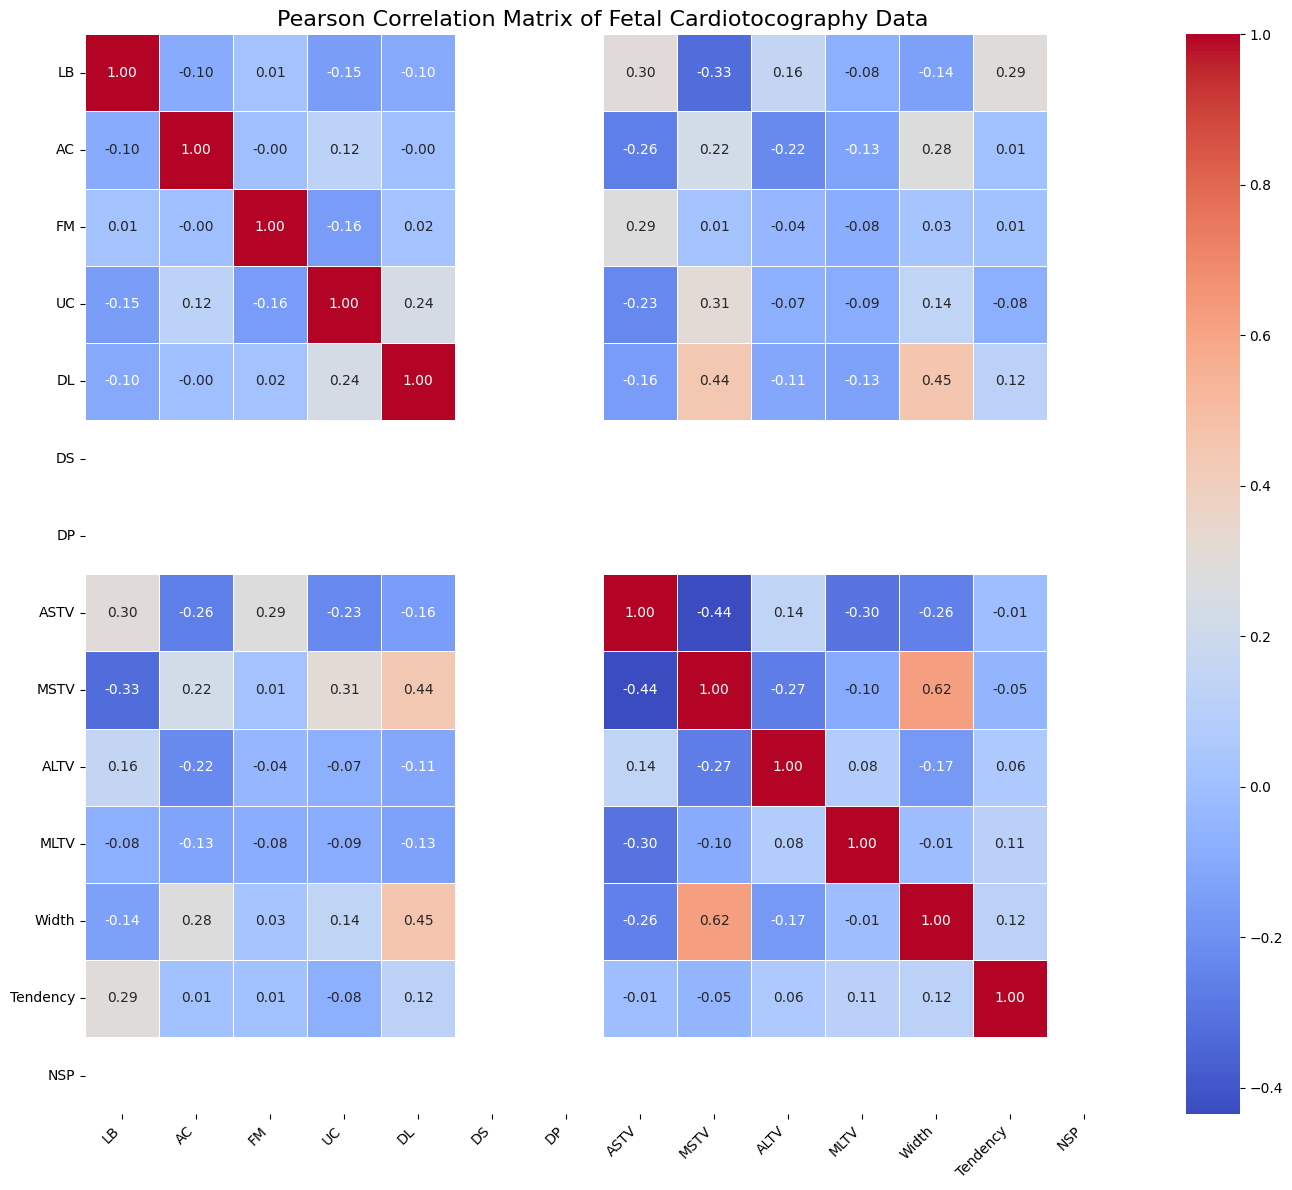

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 12)) # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Matrix of Fetal Cardiotocography Data', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Insights:**
The heatmap provides an intuitive and immediate understanding of the linear relationships within the dataset. It quickly draws attention to highly correlated (positive or negative) pairs and those with negligible correlation.
The visual patterns align with physiological expectations, such as the inverse relationship between healthy and abnormal variability measures.
It underscores the importance of feature selection for predictive modeling, as highly correlated features might lead to multicollinearity, while weakly correlated features might not contribute much individually to a linear model.


# Conclusion:
The EDA has provided a robust understanding of the data's structure, identified key characteristics of individual features, uncovered important relationships, and highlighted critical considerations for subsequent modeling stages, particularly regarding class imbalance and the nature of certain variables as categorical despite being numerical.

**Impact on Decision-Making and Further Analyses:**

**Guiding Feature Selection and Engineering:**

Highly Correlated Features: The correlation matrix identified strong positive correlations (e.g., Width and MSTV). This suggests potential multicollinearity if all are used directly in linear models. 
Decision: Consider dimensionality reduction techniques or feature engineering to combine or select a single representative feature, reducing redundancy and improving model interpretability.

Sparse Features: Features like FM (Fetal Movements) showed weak correlations with most other variables. 
Decision: These might be less impactful for linear predictive models and could be considered for removal, or their non-linear relationships could be explored through tree-based models.

Ordinal Variables: NSP and Tendency were identified as ordinal despite being numerical. 
Decision: For modeling, these should be treated appropriately, possibly through one-hot encoding or ordinal encoding, rather than as continuous numerical variables, to ensure correct interpretation and model performance.

**Informing Model Selection and Strategy:** 

Class Imbalance in NSP: The overwhelming predominance of 'Normal' cases (NSP=1) poses a major challenge for predictive modeling. Decision: Strategies to address this imbalance will be crucial. This includes techniques like oversampling minority classes (SMOTE), undersampling majority classes, using cost-sensitive learning algorithms, or employing evaluation metrics robust to imbalance (e.g., F1-score, precision-recall curve, AUC-PR) instead of simple accuracy.

Nature of Relationships: Some variables exhibited clear linear relationships, while others were non-linear or concentrated at zero. 
Decision: This diversity suggests that a single model type might not be optimal. Tree-based models (e.g., Random Forest, Gradient Boosting) might better capture non-linear relationships and interactions, while linear models could be effective for features with clear linear correlations.

**Enhancing Clinical Interpretation and Domain Understanding:** 
Physiological Insights: The identified correlations (e.g., inverse relationship between AC and DL, strong positive between MSTV and Width, strong negative between MSTV and ASTV) align with clinical understanding of fetal well-being and distress. 
Decision: These insights reinforce the validity of the data and can be used to interpret model predictions in a clinically meaningful way, explaining why a model might classify a fetus as suspect or pathologic.

Differentiating Fetal States: The pair plots clearly showed that the NSP variable differentiates the distributions of physiological parameters. 
Decision: This provides confidence that these features collectively carry predictive power for fetal state classification, informing clinicians about the underlying physiological changes associated with different outcomes.

**Identifying Data Collection or Improvement Needs:**
Lack of Temporal Information: The absence of temporal data limits the ability to analyze trends over time. 
Decision: If predicting changes or progression is critical, future data collection efforts should prioritize including timestamps or sequence numbers. Alternatively, the analysis must proceed without time-dependent insights.

Low Variance Columns: DS and DP showed very low variance post-treatment, leading to NaN correlations. 
Decision: Investigate if these events are genuinely rare in the population or if their measurement is inconsistent. For modeling, they might be either removed or combined with other features if they provide minimal signal on their own.